A simple Body Fat Prediction model using Linear Regression

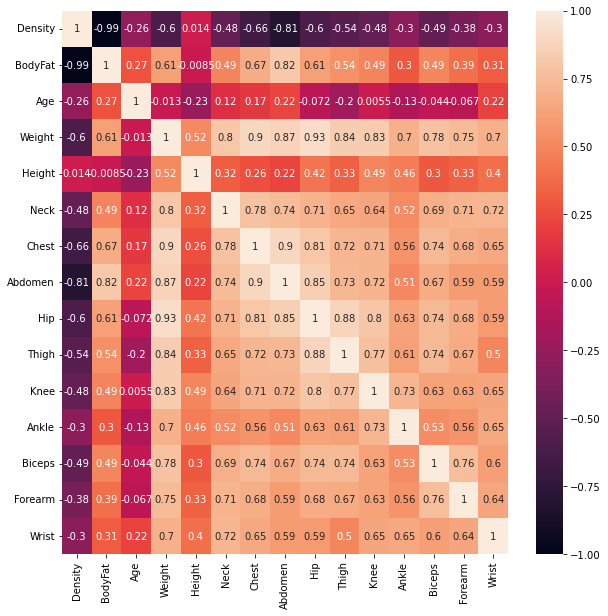

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("bodyfat.csv")
features = list(data.columns)
corr = data[features].corr(method = "spearman")
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True,vmin=-1,vmax=1)
plt.show()

For the simplicity of the web app, we will only select top 5 related variables and get them as input from user for prediction. These variables are Abdomen, Chest, Hip, Weight and Thigh. We will only select these columns from our dataframe while developing the model.

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
X = data[["Abdomen","Chest","Hip","Weight","Thigh"]]
y = data["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)
rmse = mean_squared_error(y_test,y_pred,squared=False)
print("Score:",score)
print("RMSE:",rmse)
pickle.dump(reg,open('reg.pkl','wb'))

Score: 0.7356570528102454
RMSE: 4.084171730503838


We did train our model using these parameters, and also saved the model as reg.pkl to use it in the front end section while predicting.